# <font color="redblue">**Análisis de Comparendos de Tránsito en el Departamento de Bolívar por el período 2019-2023**</font>

##### El presente analisis se aplica a dataset **"Comparendos Impuestos en Bolívar por Tipo de Infracción**, descargado del portal nacional Colombiano de datos abiertos [datos.gov.co](https://www.datos.gov.co/Transporte/Comparendos-Impuestos-en-Bol-var-por-Tipo-de-Infra/hfxy-8gt2/about_data). En este conjunto de Datos se puede visualizar los comparendos Impuestos en Bolívar por Tipo de Infracción ocurridos en el periodo 2019 al 2023, Mes a Mes.
##### A continuacion realizaremos un analitisis descriptivo de los datos donde realizaremos el proceso de ETL y visualizacion de los mismos en periodos anuales. Para ello, haremos uso del Lenguaje Python y sus bibliotecas incorporadas: Numpy, Pandas, Matplotlib, Seaborns, Pyplot y Cufflinks.

## <font color="redblue">**0. Descripcion del Dataset y Planteamiento de las Preguntas de Negocio**</font>

### <font color="redblue">**0.1. Descripcion del Dataset**</font>

##### El Dataset que utilizaremos se llama **Comparendos Impuestos en Bolívar por Tipo de Infracción** y contiene informacion de alrededor de 65 tipos de comparendos de transito impuestos en el Departamento de Bolivar, Colombia; en el periodo comprendido entre los años 2019 y 2023. Cada fila representa un tipo de comparendo, y las columnas, describen la cantidad de comparendo impuesto por mes y por años. A continuación, se presenta una descripción de las principales columnas del dataset:

1. **INFRACCCIONES 2019:** Codigo de la infraccion

2. **DESCRIPCION COMP:** Descripcion del tipo de comparendo

3. **ENERO 2019...DICIEMBRE 2023:** Cantidad de comparendos impuestos en el mes

4. **TOTAL 2019...TOTAL 2023:** Total de Comparendos impuestos en el año  

### <font color="redblue">**0.2. Preguntas de Negocio**</font>


##### Para desarrollar este proyecto debemos partir de las preguntas de negocio a resolver, en terminos generales y especificos


#####  <font color="redblue">**a. Tendencias Generales:**</font>
* ¿Cuál es la tendencia general en el número de comparendos año tras año? ¿Está aumentando, disminuyendo o permaneciendo estable?
* ¿Qué comparendos muestran las tendencias más significativas (ya sean incrementos o decrementos)?

##### <font color="redblue">**b. Comparendos Específicos:**</font>
* ¿Cuáles son los tipos de comparendos más comunes en el período 2019-2023?
* ¿Hay algún tipo de comparendo que haya tenido un cambio drástico en un año específico?


##### <font color="redblue">**c. Segmentación por Tipo de Comparendo:**</font>
* ¿Qué categorías de comparendos representan el mayor porcentaje del total de comparendos?
* ¿Existen ciertos tipos de comparendos que son más prevalentes en años específicos?

## <font color="redblue">**1. Lectura, preparacion y normalizacion de los datos**</font>

### <font color="redblue">**1.1 Importacion de bibliotecas y lectura de dataset y almacenado en variable**</font>

In [94]:
# Importamos biliotecas necesarias para ejecutar proyecto
import numpy as np # Algebra lineas, operaciones matematicas y manipulacion de arreglos
import pandas as pd # Procesamiento de datos, manipulacion de archivos CSV, xlsx, PDF, etc
import matplotlib.pyplot as plt # Visulizacion de datos mediante graficos
import seaborn as sns # Creacion de graficos interactivos y avanzados
import plotly.express as px # Graficos interactivos y visualizaciones avanzadas 

# Importamos la libreria cufflinks y realizamos configuraciones
import cufflinks as cf # Creación de gráficos sea más rápida y eficiente
import plotly.io as pio # Crear gráficos de alta calidad
from IPython.display import display, HTML # Visualizaciones interactivas

cf.set_config_file(sharing="public", theme="white", offline= True) # Configuracion de la visualizacion
from IPython.display import Image # Mostrar la imagen guardada en el notebook(Para poder visulizar en GitHub)

In [95]:
#Cargamos el dataset objeto de estudio y almacenamos en una variable
archivo_comparendos = (r"\Ricardo\Programacion\Data_Science\Proyectos_DS\comparendos_transito_Bolivar\data\Comparendos_Bolivar_por_Tipo_de_Infraccion.csv")
comparendos = pd.read_csv(archivo_comparendos)
comparendos

,INFRACCCIONES 2019,DESCRIPCION COMP,ENERO 2019,FEBRERO 2019,MARZO 2019,ABRIL 2019,MAYO 2019,JUNIO 2019,JULIO 2019,AGOSTO 2019,...,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,AGOSTO 2023,SEPTIEMBRE 2023,OCTUBRE 2023,NOVIEMBRE 2023,DICIEMBRE 2023,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A02,Agarrarse de otro vehículo en movimiento.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,D02,Conducir sin portar los seguros ordenados por ...,36,236,229,212,300,152,152,216,...,50,70,20,14,2,2,29,3,1,297
293,D13,En caso de transportar carga con peso superior...,0,0,0,0,0,0,0,0,...,0,13,24,22,18,15,13,13,16,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,307,281,271,110,107,132,132,246,...,10,10,4,3,2,4,68,14,9,159
295,C24,Conducir motocicleta sin observar las normas e...,43,42,67,28,37,44,44,66,...,77,190,72,45,0,0,30,2,1,480


### <font color="redblue">**1.2. Analisis de la Info del DataFrame**</font>

##### Imprimimos informacion del DataFrame

In [96]:
#Visualizamos informacion del DataFrame
comparendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INFRACCCIONES 2019  297 non-null    object
 1   DESCRIPCION COMP    296 non-null    object
 2   ENERO 2019          297 non-null    int64 
 3   FEBRERO 2019        297 non-null    object
 4   MARZO 2019          297 non-null    object
 5   ABRIL 2019          297 non-null    int64 
 6   MAYO 2019           297 non-null    int64 
 7   JUNIO 2019          297 non-null    int64 
 8   JULIO 2019          297 non-null    int64 
 9   AGOSTO 2019         297 non-null    int64 
 10  SEPTIEMBRE 2019     297 non-null    int64 
 11  OCTUBRE 2019        297 non-null    int64 
 12  NOVIEMBRE 2019      297 non-null    int64 
 13  DICIEMBRE 2019      297 non-null    int64 
 14  TOTAL-19            297 non-null    object
 15  ENERO 2020          297 non-null    int64 
 16  FEBRERO 2020        297 no

##### Visualizando la informacion del DataFrame, observamos que:
a. La columna DESCRIPCION COMP  posee un valor nulo (NaN).

b. Varias columnas no son del tipo de datos(Dtype) que deberian ser, es decir, tenemos varias columnas con datos numericos representados como de tipo "object", por tanto, se deben convertir a tipo "int".

### <font color="redblue">**1.3. Valores Nulos (NaN)**</font>

In [97]:
#Verificamos y confirmamos existencia de valores nulos
comparendos.isnull().sum()

INFRACCCIONES 2019    0
DESCRIPCION COMP      1
ENERO 2019            0
FEBRERO 2019          0
MARZO 2019            0
                     ..
SEPTIEMBRE 2023       0
OCTUBRE 2023          0
NOVIEMBRE 2023        0
DICIEMBRE 2023        0
TOTAl 2023            0
Length: 67, dtype: int64

##### Identificamos que el valor NaN corresponde a campo de la columna DESCRIPCION COMP  ubicado en la ultima fila, por tanto, procedemos a eliminarla ya que no es imprescindible para nuestro analisis.

In [98]:
#Eliminmos ultima fila del DataFrame("ToTal")
comparendos= comparendos.drop(index=296)

### <font color="redblue">**1.4. Transformacion del Tipo de Datos (Dtype)**</font>

In [99]:
#Aislamos las columnas que tienen un tipo de formato que no le corresponde
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]]

,FEBRERO 2019,MARZO 2019,TOTAL-19,JUNIO 2020,TOTAL 2020,TOTAL 2021,TOTAL 2022,TOTAl 2023
0,0,0,0,0,1,0,5,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,2,0
3,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
291,312,328,"1,990",69,516,189,545,319
292,236,229,"2,162",389,"1,586",246,553,297
293,0,0,0,0,1,641,230,160
294,281,271,"2,306",154,"1,611","1,000",245,159


##### Al momento de realizar la transformacion del tipo de dato, encontramos algunos datos numericos que contenian caracteres especiales(","); por ende, primero, debemos eliminar esos caracteres para poder transformar a datos numericos.

In [100]:
#Transformamos las columnas de tipo object que tienen caracteres especiales
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]] = comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]].applymap(lambda x: x.replace("," ,""))
comparendos


C:\Users\Pater\AppData\Local\Temp\ipykernel_11868\4118218439.py:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,INFRACCCIONES 2019,DESCRIPCION COMP,ENERO 2019,FEBRERO 2019,MARZO 2019,ABRIL 2019,MAYO 2019,JUNIO 2019,JULIO 2019,AGOSTO 2019,...,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,AGOSTO 2023,SEPTIEMBRE 2023,OCTUBRE 2023,NOVIEMBRE 2023,DICIEMBRE 2023,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A02,Agarrarse de otro vehículo en movimiento.,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,C35,No realizar la revisión tecnicomecánica y de e...,42,312,328,213,214,140,140,163,...,41,50,36,25,4,4,20,5,2,319
292,D02,Conducir sin portar los seguros ordenados por ...,36,236,229,212,300,152,152,216,...,50,70,20,14,2,2,29,3,1,297
293,D13,En caso de transportar carga con peso superior...,0,0,0,0,0,0,0,0,...,0,13,24,22,18,15,13,13,16,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,307,281,271,110,107,132,132,246,...,10,10,4,3,2,4,68,14,9,159


In [101]:
#Transformamos las columnas de tipo objeto a int64 y verificamos 
comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]] = comparendos[["FEBRERO 2019","MARZO 2019","TOTAL-19","JUNIO 2020","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]].astype(np.int64)
comparendos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   INFRACCCIONES 2019  296 non-null    object
 1   DESCRIPCION COMP    296 non-null    object
 2   ENERO 2019          296 non-null    int64 
 3   FEBRERO 2019        296 non-null    int64 
 4   MARZO 2019          296 non-null    int64 
 5   ABRIL 2019          296 non-null    int64 
 6   MAYO 2019           296 non-null    int64 
 7   JUNIO 2019          296 non-null    int64 
 8   JULIO 2019          296 non-null    int64 
 9   AGOSTO 2019         296 non-null    int64 
 10  SEPTIEMBRE 2019     296 non-null    int64 
 11  OCTUBRE 2019        296 non-null    int64 
 12  NOVIEMBRE 2019      296 non-null    int64 
 13  DICIEMBRE 2019      296 non-null    int64 
 14  TOTAL-19            296 non-null    int64 
 15  ENERO 2020          296 non-null    int64 
 16  FEBRERO 2020        296 no

##### La informacion del DataFrame muestra que cada columna queda con el tipo de dato que corresponde

### <font color="redblue">**1.5. Registros Duplicados**</font> 

##### Es importante asegurarnos de que no haya registros duplicados, ya que estos pueden distorsionar el análisis y llevar a conclusiones incorrectas

In [102]:
#Verificamos la existencia de duplicados
comparendos[comparendos.duplicated()]

,INFRACCCIONES 2019,DESCRIPCION COMP,ENERO 2019,FEBRERO 2019,MARZO 2019,ABRIL 2019,MAYO 2019,JUNIO 2019,JULIO 2019,AGOSTO 2019,...,ABRIL 2023,MAYO 2023,JUNIO 2023,JULIO 2023,AGOSTO 2023,SEPTIEMBRE 2023,OCTUBRE 2023,NOVIEMBRE 2023,DICIEMBRE 2023,TOTAl 2023


##### Como se oberva, no existen registros duplicados en el DataFrame

### <font color="redblue">**1.6. Seleccion y Transformacion de Columnas y Filas objeto de estudio**</font> 

##### Como nuestro analisis esta enfocado en periodos anuales, procedemos a seleccionar las columnas "TOTAL" de cada año. Tambien, eliminaremos las filas cuya totalidad de datos se encuentren en "0" en aras de reducir el tamaño del DataFrame.

In [103]:
#Seleccionamos las columnas a las que realizaremos analisis
comparendos_año = comparendos[["INFRACCCIONES 2019", "DESCRIPCION COMP", "TOTAL-19","TOTAL 2020","TOTAL 2021","TOTAL 2022","TOTAl 2023"]]
comparendos_año

,INFRACCCIONES 2019,DESCRIPCION COMP,TOTAL-19,TOTAL 2020,TOTAL 2021,TOTAL 2022,TOTAl 2023
0,A01,No transitar por la derecha de la vía,0,1,0,5,0
1,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,1,0,2,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0
...,...,...,...,...,...,...,...
291,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319
292,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297
293,D13,En caso de transportar carga con peso superior...,0,1,641,230,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,2306,1611,1000,245,159


In [104]:
#Editamos el nombre de las columnas
comparendos_año.columns = ["CODIGO", "COMPARENDO", "AÑO_2019","AÑO_2020","AÑO_2021","AÑO_2022","AÑO_2023"]
comparendos_año


,CODIGO,COMPARENDO,AÑO_2019,AÑO_2020,AÑO_2021,AÑO_2022,AÑO_2023
0,A01,No transitar por la derecha de la vía,0,1,0,5,0
1,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0
2,A03,Transportar personas o cosas que disminuyan su...,0,1,0,2,0
3,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0
4,A05,No respetar las señales de tránsito,0,0,0,0,0
...,...,...,...,...,...,...,...
291,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319
292,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297
293,D13,En caso de transportar carga con peso superior...,0,1,641,230,160
294,D01,Guiar un vehículo sin haber obtenido la licenc...,2306,1611,1000,245,159


In [105]:
#Filtramos las filas que contienen datos irrelevantes (todas las filas con totalidad de campos con valor 0)
comparendos_remover = comparendos_año.query("AÑO_2019==0 & AÑO_2020==0 & AÑO_2021==0 & AÑO_2022==0 & AÑO_2023==0").index
comparendos_remover


Index([  4,   5,   6,   8,   9,  10,  11,  16,  17,  19,
       ...
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275],
      dtype='int64', length=233)

In [106]:
#Eliminamos filas innecesarias
comparendos_año.drop(comparendos_remover, axis=0, inplace=True)

In [107]:
#Verificamos eliminacion de filas
comparendos_año.query("AÑO_2019==0 & AÑO_2020==0 & AÑO_2021==0 & AÑO_2022==0 & AÑO_2023==0")

,CODIGO,COMPARENDO,AÑO_2019,AÑO_2020,AÑO_2021,AÑO_2022,AÑO_2023


In [108]:
#Creamos nueva columna para totalizar comparendos 
comparendos_año["TOTAL"] = comparendos_año["AÑO_2019"]+comparendos_año["AÑO_2020"]+comparendos_año["AÑO_2021"]+comparendos_año["AÑO_2022"]+comparendos_año["AÑO_2023"]

#Editamos nuevamente nombre de columnas para mejor visualizacion
comparendos_año.columns = ["CODIGO", "COMPARENDO", "2019","2020","2021","2022","2023", "TOTAL"]

#Presentamos el DtataFrame por orden ascendente de la coumna "TOTAL" 
comparendos_año = comparendos_año.sort_values(by="TOTAL", ascending=True).reset_index(drop=True)
comparendos_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0,1
1,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0,1
2,A08,"Transitar por zonas prohibidas o, por aquellas...",1,0,0,0,0,1
3,B10,"Conducir un vehículo con vidrios polarizados, ...",1,0,0,0,0,1
4,C36,Transportar carga en contenedores sin los disp...,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
58,D12,"Conducir un vehículo que, sin la debida autori...",398,12,310,559,246,1525
59,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319,3559
60,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480,4230
61,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297,4844


##### Realizadas las transformaciones anteriores, nuestro DataFrame queda a un tamaño de 63 filas x 8 columnas.

### **<font color="redblue">1.7. Analisis estadistico</font>**

In [109]:
#Visualizamos descripcion estadistica de los datos
comparendos_año.describe()

,2019,2020,2021,2022,2023,TOTAL
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,146.968254,103.253968,66.571429,47.698413,28.587302,393.079365
std,468.727687,350.528309,197.746638,140.241340,88.172601,1127.234545
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,1.000000,1.000000,0.000000,8.000000
75%,24.500000,2.000000,11.500000,8.000000,4.500000,49.000000
max,2306.000000,1611.000000,1000.000000,571.000000,480.000000,5321.000000


##### **Analisis de la descripcion**
* La media (mean) muestra una tendencia decreciente en el número de comparendos emitidos cada año desde 2019 hasta 2023.
* La variabilidad en el número de comparendos emitidos se ha reducido considerablemente con el tiempo.
* Aunque el valor máximo ha disminuido, el hecho de que haya años con 0 comparendos sugiere que hay períodos o lugares donde no se han emitido comparendos.
* La mayor parte de los datos muestra una disminución en el número de comparendos emitidos, destacando una tendencia general hacia una menor emisión de comparendos.

##### Conforme a lo analizado anteriormente, procedemos a graficar el histograma para ver la frecuencia de los datos anuales

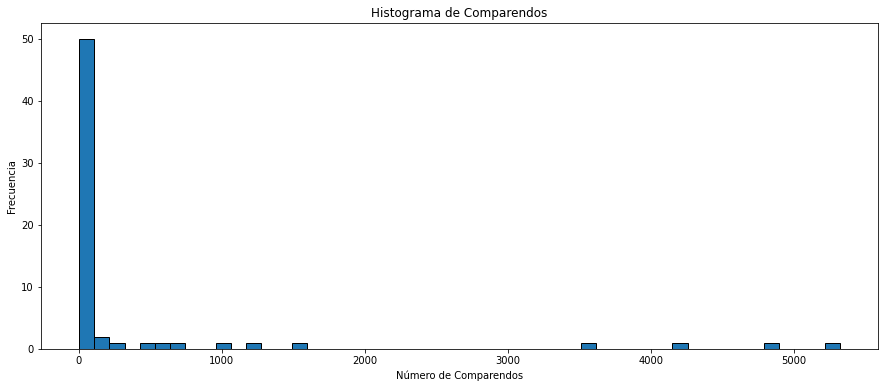

In [110]:
# Histograma con Seaborn
plt.figure(figsize=(15, 6))
plt.hist(comparendos_año['TOTAL'], bins=50, edgecolor="black")
plt.title('Histograma de Comparendos')
plt.xlabel('Número de Comparendos')
plt.ylabel('Frecuencia')
plt.show()


##### Podemos ver que la cola del histograma está hacia la derecha; esto indica que, a pesar que eliminamos una cantidad considerable de filas de comparendos que se totalizaban en cero("0") aun hay valores extremos bajos; lo cual, significa un sesgo a la izquierda. Por tanto, procedemos a realizar una graficas preliminares para ver como se visualizan.

### <font color="redblue">**1.8. Visualizacion preliminar**</font>

#### **Valores extremos bajos**

In [111]:
comparendos_año.query("TOTAL<10")

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,A02,Agarrarse de otro vehículo en movimiento.,1,0,0,0,0,1
1,A04,"Transitar por andenes, aceras, puentes o de ma...",1,0,0,0,0,1
2,A08,"Transitar por zonas prohibidas o, por aquellas...",1,0,0,0,0,1
3,B10,"Conducir un vehículo con vidrios polarizados, ...",1,0,0,0,0,1
4,C36,Transportar carga en contenedores sin los disp...,0,0,1,0,0,1
5,C19,Dejar o recoger pasajeros en sitios distintos ...,1,0,0,0,0,1
6,C16,Conducir un vehículo escolar sin el permiso re...,1,0,0,0,0,1
7,C08,Transitar sin los dispositivos luminosos reque...,0,0,1,0,0,1
8,G02,Los peatones y ciclistas que no cumplan con la...,0,0,0,0,1,1
9,F06,Actuar de manera que ponga en peligro su integ...,0,0,1,0,0,1


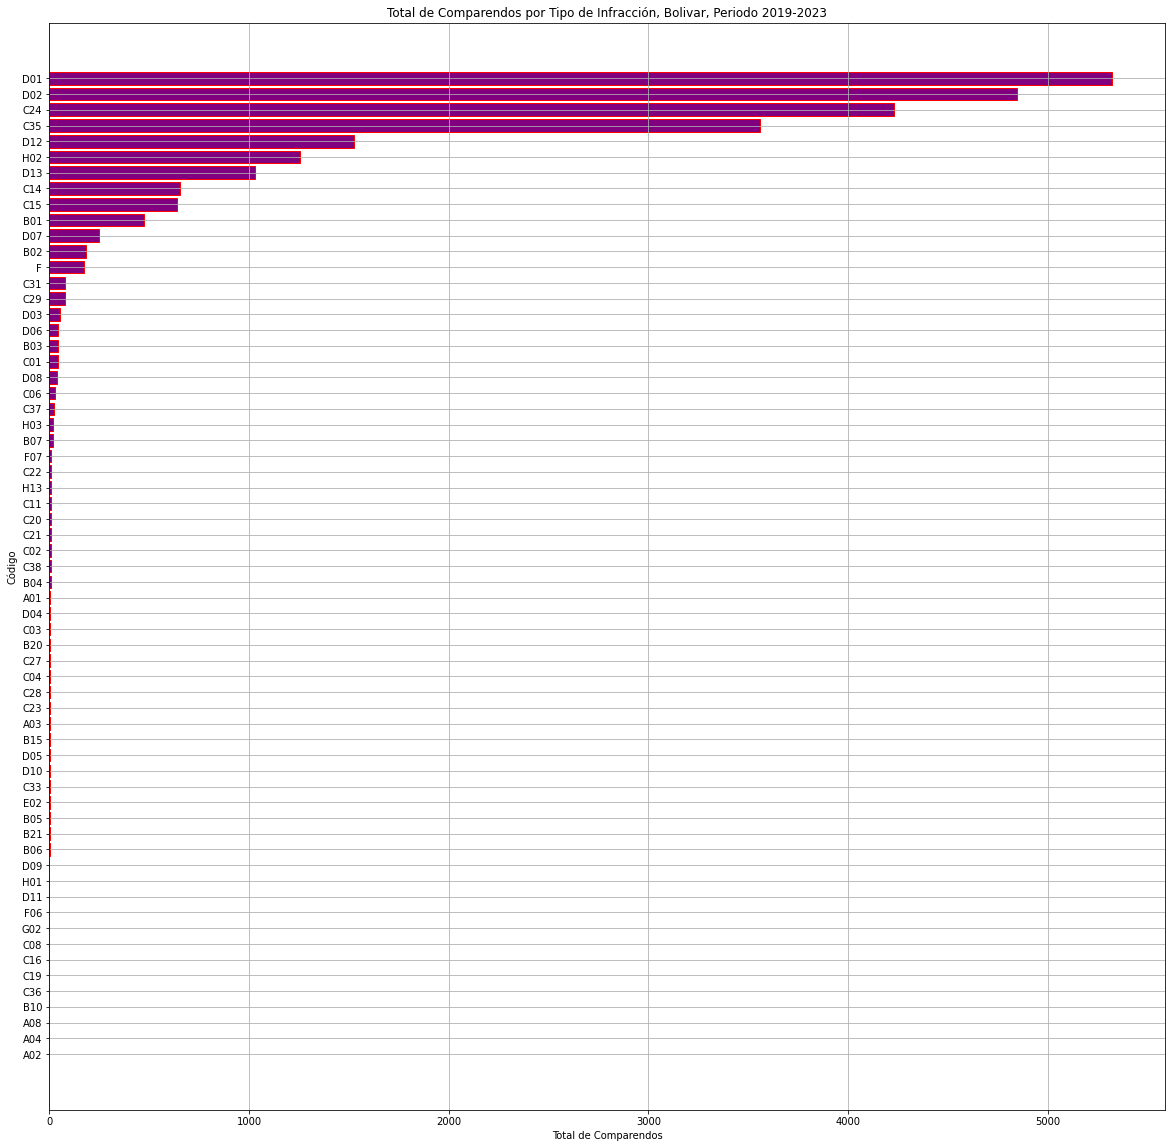

In [112]:
#Grafico de barras preliminar
plt.figure(figsize=(20,20))
plt.barh(comparendos_año["CODIGO"], comparendos_año["TOTAL"], color="purple", edgecolor='red')
plt.title('Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.grid(visible=True)
plt.xlabel('Total de Comparendos')
plt.ylabel('Código')
plt.show()

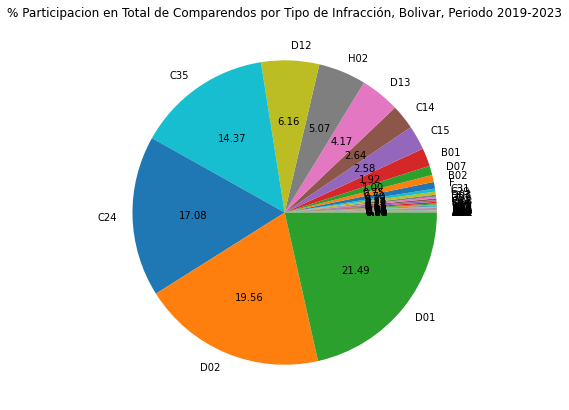

In [113]:
#Diagrama de Tortas preliminar
plt.figure(figsize=(15,7))
plt.pie(comparendos_año["TOTAL"], labels=comparendos_año["CODIGO"], autopct='%.2f')
plt.title('% Participacion en Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.show()

### <font color="redblue">**1.9. Criterios de seleccion de muestra de datos a visualizar**</font>

##### En vista del sesgo a la izquierda y de la ilegibilidad de los graficos, procedemos a seleccionar una muestra representativa del total de comparendos. Por tanto, decidimos trabajar con datos de comparendos cuyo "Total" corresponda al 0,99% o mas del total de comparendos en general.

In [114]:
#Filtramos columna "TOTAL" que contengan datos mayores al 1% del Total de la columna
comparendos_año[["CODIGO","COMPARENDO","TOTAL"]].sort_values("TOTAL", ascending=True)

df_comparendo_año = comparendos_año.query("TOTAL > ((TOTAL.sum())*0.0099)").reset_index(drop=True)
df_comparendo_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,D07,Conducir realizando maniobras altamente peligr...,139,41,28,33,6,247
1,B01,Conducir un vehículo sin llevar consigo la lic...,334,71,60,8,3,476
2,C15,"Conducir un vehículo, particular o de servicio...",238,200,156,29,15,638
3,C14,Transitar por sitios restringidos o en horas p...,78,443,65,58,10,654
4,D13,En caso de transportar carga con peso superior...,0,1,641,230,160,1032
5,H02,El conductor que no porte la licencia de tráns...,535,388,293,26,13,1255
6,D12,"Conducir un vehículo que, sin la debida autori...",398,12,310,559,246,1525
7,C35,No realizar la revisión tecnicomecánica y de e...,1990,516,189,545,319,3559
8,C24,Conducir motocicleta sin observar las normas e...,604,1587,988,571,480,4230
9,D02,Conducir sin portar los seguros ordenados por ...,2162,1586,246,553,297,4844


#### El siguiente analisis nos demuestra que la muestra seleccionada corresponde al 96.03% de la poblacion de estudio

In [115]:
total_comparendos_original = comparendos_año["TOTAL"].sum()
print(f"El total de comparendos de la poblacion es {total_comparendos_original}")
total_comparendos_filtrado = df_comparendo_año["TOTAL"].sum()
print(f"El total de comparendos de la muestra es {total_comparendos_filtrado}")
porcentaje_muestra = round(((total_comparendos_filtrado/total_comparendos_original)*100),2)
print(f"La representacion de la muestra en el total de comparendos es del {porcentaje_muestra}%")

El total de comparendos de la poblacion es 24764
El total de comparendos de la muestra es 23781
La representacion de la muestra en el total de comparendos es del 96.03%


### <font color="redblue">**1.10. Transformacion del DataFrame de la Muestra**</font>

##### Procedemos a editar las descripciones de los comparendos para hacer mas legible el DataFrame y posterior visualizacion

In [116]:
#Listamos datos de la columna "COMPARENDO" a editar
df_comparendo_año["COMPARENDO"].unique()

array(['Conducir realizando maniobras altamente peligrosas, siempre y cuando la maniobra viole las normas de transito que pongan en peligro a las personas o las cosas y que constituyan conductas dolosas o altamente imprudentes.',
       'Conducir un vehículo sin llevar consigo la licencia de conducción',
       'Conducir un vehículo, particular o de servicio público, excediendo la capacidad autorizada en la licencia de tránsito o tarjeta de operación',
       'Transitar por sitios restringidos o en horas prohibidas por la autoridad competente. Además, el vehículo será inmovilizado',
       'En caso de transportar carga con peso superior al autorizado el vehículo será inmovilizado y el exceso deberá ser transbordado. La licencia de conducción será suspendida hasta por seis (6) meses',
       'El conductor que no porte la licencia de tránsito, Además el vehículos será inmovilizado',
       'Conducir un vehículo que, sin la debida autorización, se destine a un servicio diferente de aquel 

In [117]:
#Transformamos las descripciones de los datos de columa "COMPARENDO" para mejorar legibilidad
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Transitar por sitios restringidos o en horas prohibidas por la autoridad competente. Además, el vehículo será inmovilizado","Transitar por sitio u hora restringida")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo sin llevar consigo la licencia de conducción","Conducir un vehículo con la licencia de conducción vencida.")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("El conductor que no porte la licencia de tránsito, Además el vehículos será inmovilizado","No portar la licencia de conducción")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo, particular o de servicio público, excediendo la capacidad autorizada en la licencia de tránsito o tarjeta de operación", "Conducir vehículo con sobrecupo")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir un vehículo que, sin la debida autorización, se destine a un servicio diferente de aquel para el cual tiene licencia de tránsito. Además, el vehículo será inmovilizado por primera vez, por el término de cinco días, por segunda vez veinte días y por tercera vez cuarenta días","Conducir vehículo destinado a servicio diferente al autorizado")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir sin portar los seguros ordenados por la ley. Además, el vehículo será inmovilizado", "Conducir sin el SOAT")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("En caso de transportar carga con peso superior al autorizado el vehículo será inmovilizado y el exceso deberá ser transbordado. La licencia de conducción será suspendida hasta por seis (6) meses", "Transportar carga con peso superior al autorizado")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Guiar un vehículo sin haber obtenido la licencia de conducción correspondiente. Además, el vehículo será inmovilizado en el lugar de los hechos, hasta que éste sea retirado por una persona autorizada por el infractor con licencia de conducción", "Conducir sin tener licencia de conducción correspondiente")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].replace("Conducir motocicleta sin observar las normas establecidas en el presente código", "Conducir motocicleta sin observar las normas")
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].apply(lambda x: x.replace("No realizar la revisión tecnicomecánica y de emisión contaminantes en los siguientes plazos o cuando aun portando los certificados correspondientes no cuenta  con las siguientes condiciones técnicomecánica y de emisiones contaminantes, además el vehículo será inmovilizado.", "No tener revisión tecnicomecánica"))
df_comparendo_año["COMPARENDO"] = df_comparendo_año["COMPARENDO"].apply(lambda x: x.replace("Conducir realizando maniobras altamente peligrosas, siempre y cuando la maniobra viole las normas de transito que pongan en peligro a las personas o las cosas y que constituyan conductas dolosas o altamente imprudentes", "Conducir realizando maniobras altamente peligrosas"))

#Estado actual de las descripciones
df_comparendo_año["COMPARENDO"].unique()

array(['Conducir realizando maniobras altamente peligrosas.',
       'Conducir un vehículo con la licencia de conducción vencida.',
       'Conducir vehículo con sobrecupo',
       'Transitar por sitio u hora restringida',
       'Transportar carga con peso superior al autorizado',
       'No portar la licencia de conducción',
       'Conducir vehículo destinado a servicio diferente al autorizado',
       'No tener revisión tecnicomecánica',
       'Conducir motocicleta sin observar las normas',
       'Conducir sin el SOAT',
       'Conducir sin tener licencia de conducción correspondiente'],
      dtype=object)

### <font color="redblue">**1.11. DataFrame Final - Comparendos de Transito en Bolivar por el Perido 2019-2023**</font>

In [118]:
#Imprimimos DataFrame final con el cual realizaremos las visualizaciones
df_comparendo_año

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,D07,Conducir realizando maniobras altamente peligr...,139,41,28,33,6,247
1,B01,Conducir un vehículo con la licencia de conduc...,334,71,60,8,3,476
2,C15,Conducir vehículo con sobrecupo,238,200,156,29,15,638
3,C14,Transitar por sitio u hora restringida,78,443,65,58,10,654
4,D13,Transportar carga con peso superior al autorizado,0,1,641,230,160,1032
5,H02,No portar la licencia de conducción,535,388,293,26,13,1255
6,D12,Conducir vehículo destinado a servicio diferen...,398,12,310,559,246,1525
7,C35,No tener revisión tecnicomecánica,1990,516,189,545,319,3559
8,C24,Conducir motocicleta sin observar las normas,604,1587,988,571,480,4230
9,D02,Conducir sin el SOAT,2162,1586,246,553,297,4844


In [119]:
# Aplicamos estilos al DataFrame para visulizar valores maximos y minimos
df_comparendo_styled = df_comparendo_año.style\
    .set_caption("COMPARENDOS IMPUESTOS EN BOLIVAR, 2019 - 203")\
    .highlight_max(axis=0, color="green", subset=["2019", "2020", "2021", "2022", "2023", "TOTAL"])\
    .highlight_min(axis=0, color="lightcoral", subset=["2019", "2020", "2021", "2022", "2023", "TOTAL"])\
    .format("{:,.2f}", subset=["2019", "2020", "2021", "2022", "2023", "TOTAL"])\

df_comparendo_styled

,CODIGO,COMPARENDO,2019,2020,2021,2022,2023,TOTAL
0,D07,Conducir realizando maniobras altamente peligrosas.,139.00,41.00,28.00,33.00,6.00,247.00
1,B01,Conducir un vehículo con la licencia de conducción vencida.,334.00,71.00,60.00,8.00,3.00,476.00
2,C15,Conducir vehículo con sobrecupo,238.00,200.00,156.00,29.00,15.00,638.00
3,C14,Transitar por sitio u hora restringida,78.00,443.00,65.00,58.00,10.00,654.00
4,D13,Transportar carga con peso superior al autorizado,0.00,1.00,641.00,230.00,160.00,"1,032.00"
5,H02,No portar la licencia de conducción,535.00,388.00,293.00,26.00,13.00,"1,255.00"
6,D12,Conducir vehículo destinado a servicio diferente al autorizado,398.00,12.00,310.00,559.00,246.00,"1,525.00"
7,C35,No tener revisión tecnicomecánica,"1,990.00",516.00,189.00,545.00,319.00,"3,559.00"
8,C24,Conducir motocicleta sin observar las normas,604.00,"1,587.00",988.00,571.00,480.00,"4,230.00"
9,D02,Conducir sin el SOAT,"2,162.00","1,586.00",246.00,553.00,297.00,"4,844.00"


##### Nos queda un DataFrame de 11 filas x 8 columnas para analizar

In [120]:
#Visualizados descripcion estadistica de los datos
df_comparendo_año.describe()

,2019,2020,2021,2022,2023,TOTAL
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,798.545455,586.909091,361.454545,259.727273,155.272727,2161.909091
std,891.100821,670.829107,355.107410,248.651198,163.431999,1923.861141
min,0.000000,1.000000,28.000000,8.000000,3.000000,247.000000
25%,188.500000,56.000000,110.500000,31.000000,11.500000,646.000000
50%,398.000000,388.000000,246.000000,230.000000,159.000000,1255.000000
75%,1297.000000,1051.000000,475.500000,549.000000,271.500000,3894.500000
max,2306.000000,1611.000000,1000.000000,571.000000,480.000000,5321.000000


##### **Analisis de la descripcion**
#### En la presente informacion de la muestra se observa la misma tendencia de los datos generales
* La media (mean) muestra una tendencia decreciente en el número de comparendos emitidos cada año desde 2019 hasta 2023.
* La variabilidad en el número de comparendos emitidos se ha reducido considerablemente con el tiempo.
* La mayor parte de los datos muestra una disminución en el número de comparendos emitidos, destacando una tendencia general hacia una menor emisión de comparendos.

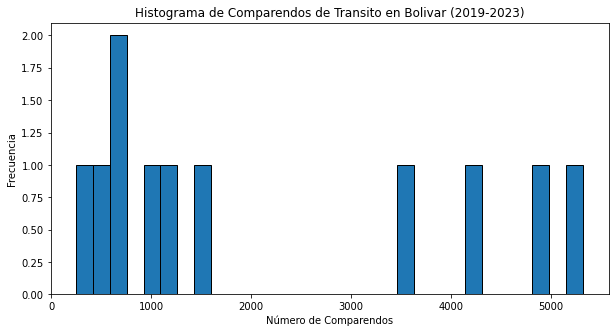

In [124]:
# Realizamos Histograma con Seaborn
plt.figure(figsize=(10, 5))
plt.hist(df_comparendo_año['TOTAL'], bins=30, edgecolor="black")

#Editamos Titulo y Etiquetas del grafico
plt.title('Histograma de Comparendos de Transito en Bolivar (2019-2023)')
plt.xlabel('Número de Comparendos')
plt.ylabel('Frecuencia')

#Guardamos graficos en carpeta y visualizamos
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_histograma.jpeg")
plt.show()

In [29]:
#Exportamos DataFRame Final
df_comparendo_año.to_csv("D:\Ricardo\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\dataframes\\comparendos_de_Transito_Bolivar_2019-2023.csv", index=False)

## <font color="redblue">**2. Visualizacion de los datos**</font> 

##### En esta segunda etapa procedemos a realizar las visualizaciones graficas del DataFrame final

### <font color="redblue">**2.1. Grafico de barras**</font>

In [30]:
# Seleccionamos columnas del Dataframe para realizar grafico de barra
df_comparendo_barh = df_comparendo_año[["COMPARENDO", "TOTAL"]].sort_values(ascending=True, by="TOTAL")
df_comparendo_barh

,COMPARENDO,TOTAL
0,Conducir realizando maniobras altamente peligr...,247
1,Conducir un vehículo con la licencia de conduc...,476
2,Conducir vehículo con sobrecupo,638
3,Transitar por sitio u hora restringida,654
4,Transportar carga con peso superior al autorizado,1032
5,No portar la licencia de conducción,1255
6,Conducir vehículo destinado a servicio diferen...,1525
7,No tener revisión tecnicomecánica,3559
8,Conducir motocicleta sin observar las normas,4230
9,Conducir sin el SOAT,4844


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


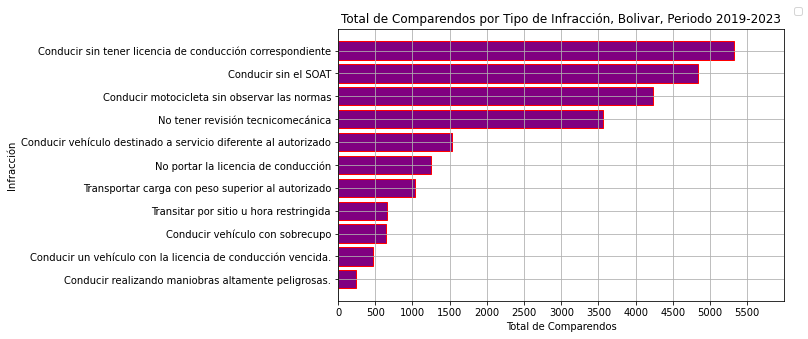

In [31]:
#Creamos Grafico de barras
plt.figure(figsize=(8,5))
plt.barh(df_comparendo_barh["COMPARENDO"], df_comparendo_barh["TOTAL"], color="purple", edgecolor='red')
plt.title('Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023')
plt.grid(visible=True)
plt.xticks(ticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500], labels=["0", "500", "1000", "1500","2000","2500","3000","3500","4000","4500","5000", "5500"])
plt.legend(bbox_to_anchor=(1.05, 1.1), loc='best')

#Editamos Titulo y Etiquetas del Grafico
plt.xlabel('Total de Comparendos')
plt.ylabel('Infracción')
plt.xlim(0,6000)

#Guardamos graficos en carpeta y visualizamos
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_barh.jpeg", bbox_inches="tight")
plt.show()

### <font color="redblue">**2.2. Grafico de Tortas**</font>

In [32]:
df_comparendo_pie = df_comparendo_año[["COMPARENDO", "TOTAL"]].sort_values(ascending=True, by="TOTAL" )
df_comparendo_pie

,COMPARENDO,TOTAL
0,Conducir realizando maniobras altamente peligr...,247
1,Conducir un vehículo con la licencia de conduc...,476
2,Conducir vehículo con sobrecupo,638
3,Transitar por sitio u hora restringida,654
4,Transportar carga con peso superior al autorizado,1032
5,No portar la licencia de conducción,1255
6,Conducir vehículo destinado a servicio diferen...,1525
7,No tener revisión tecnicomecánica,3559
8,Conducir motocicleta sin observar las normas,4230
9,Conducir sin el SOAT,4844


In [33]:
help(plt.title)

Help on function title in module matplotlib.pyplot:

title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)
    Set a title for the Axes.
    
    Set one of the three available Axes titles. The available titles
    are positioned above the Axes in the center, flush with the left
    edge, and flush with the right edge.
    
    Parameters
    ----------
    label : str
        Text to use for the title
    
    fontdict : dict
        A dictionary controlling the appearance of the title text,
        the default *fontdict* is::
    
           {'fontsize': rcParams['axes.titlesize'],
            'fontweight': rcParams['axes.titleweight'],
            'color': rcParams['axes.titlecolor'],
            'verticalalignment': 'baseline',
            'horizontalalignment': loc}
    
    loc : {'center', 'left', 'right'}, default: :rc:`axes.titlelocation`
        Which title to set.
    
    y : float, default: :rc:`axes.titley`
        Vertical Axes location for the title (1.0 

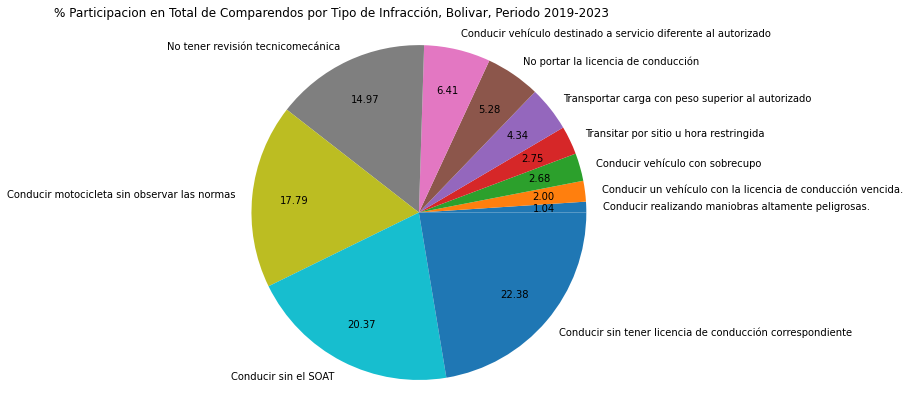

In [34]:
#Realizamos Grafico de Tortas
plt.figure(figsize=(10,7))
plt.pie(df_comparendo_pie["TOTAL"], labels=df_comparendo_pie["COMPARENDO"], autopct='%.2f', radius=1.1, pctdistance=0.75, labeldistance=1.1)
plt.grid(True)

#Editamos Titulo y Etiquetas
plt.title('% Participacion en Total de Comparendos por Tipo de Infracción, Bolivar, Periodo 2019-2023', loc="right")

#Guardamos grafico en carpeta y visualizamoms
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_pie.jpeg")
plt.show()

#### <font color="greenblue">**Preguntas de negocio:**</font>

##### Con los graficos de Barra y de Torta damos respuesta a las primeras preguntas de negocio de los puntos: <font color="greenblue">**b)** ¿Cuáles son los tipos de comparendos más comunes en el período 2019-2023?</font> y <font color="greenblue">**c)** ¿Qué categorías de comparendos representan el mayor porcentaje del total de comparendos?</font>

##### <font color="greenblue">Los Tipos de Comparendos mas comunes son: Conducir sin tener licencia de conducción correspondiente, Conducir sin el SOAT, Conducir motocicleta sin observar las normas y No tener revisión tecnicomecánica.</font> 
##### <font color="greenblue">Los comparendos, mencionados anteriormente, representan un **75,51%** del total de comparendos impuestos en el periodo 2019-2023.</font> 

### <font color="redblue"> **2.3. Graficos de lineas**</font>

#### <font color="redblue"> **2.3.1. Grafico Comparendos por Año**</font>

##### Para graficar los comprarendos por año debemos transformar el DataFrame 

In [35]:
#Filtramos columnas con las cuales vamos a trabajar
df_comparendo_lineas = df_comparendo_año[["COMPARENDO", "2019",	"2020", "2021", "2022", "2023"]].reset_index(drop=True)
df_comparendo_lineas

,COMPARENDO,2019,2020,2021,2022,2023
0,Conducir realizando maniobras altamente peligr...,139,41,28,33,6
1,Conducir un vehículo con la licencia de conduc...,334,71,60,8,3
2,Conducir vehículo con sobrecupo,238,200,156,29,15
3,Transitar por sitio u hora restringida,78,443,65,58,10
4,Transportar carga con peso superior al autorizado,0,1,641,230,160
5,No portar la licencia de conducción,535,388,293,26,13
6,Conducir vehículo destinado a servicio diferen...,398,12,310,559,246
7,No tener revisión tecnicomecánica,1990,516,189,545,319
8,Conducir motocicleta sin observar las normas,604,1587,988,571,480
9,Conducir sin el SOAT,2162,1586,246,553,297


In [36]:
#Transformamos DataFrame para realizar grafico de lineas
melt_df = pd.melt(df_comparendo_lineas, id_vars=["COMPARENDO"], var_name="AÑO", value_name="TOTAL")
melt_df

,COMPARENDO,AÑO,TOTAL
0,Conducir realizando maniobras altamente peligr...,2019,139
1,Conducir un vehículo con la licencia de conduc...,2019,334
2,Conducir vehículo con sobrecupo,2019,238
3,Transitar por sitio u hora restringida,2019,78
4,Transportar carga con peso superior al autorizado,2019,0
5,No portar la licencia de conducción,2019,535
6,Conducir vehículo destinado a servicio diferen...,2019,398
7,No tener revisión tecnicomecánica,2019,1990
8,Conducir motocicleta sin observar las normas,2019,604
9,Conducir sin el SOAT,2019,2162


In [37]:
#Agrupamos datos totalizando los comparendos por año
comparendo_anual= melt_df.groupby('AÑO').TOTAL.sum().reset_index()
comparendo_anual

,AÑO,TOTAL
0,2019,8784
1,2020,6456
2,2021,3976
3,2022,2857
4,2023,1708


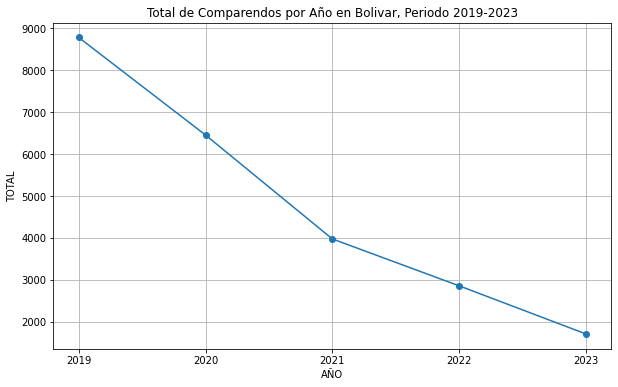

In [38]:
#Creamos Grafico de lineas
plt.figure(figsize=(10,6))
plt.plot(comparendo_anual["AÑO"], comparendo_anual["TOTAL"], marker="o")
plt.title('Total de Comparendos por Año en Bolivar, Periodo 2019-2023')
plt.grid(True)

#Editamos Titulo y Etiquetas del Grafico
plt.xlabel('AÑO')
plt.ylabel('TOTAL')

plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_linea.jpeg")
plt.show()

#### <font color="greenblue">**Preguntas de negocio:**</font>

#### Con este grafico de lineas damos respuesta a la primera pregunta de negocio del punto <font color="greenblue">**a)** ¿Cuál es la tendencia general en el número de comparendos año tras año? </font>

#### <font color="greenblue">En el grafico observamos una tendencia decreciente significativa en el número de comparendos emitidos cada año desde 2019 hasta 2023. </font>

#### <font color="redblue"> **2.3.2. Grafico Comparendos por Tipo/Año**</font>

##### Para graficar los datos de comparendos por Tipo transformamos el DataFrame df_comparendo_año y utilizamos la libreria Cufflinks para la viualizacion

In [39]:
# #Importamos la libreria
# import cufflinks as cf # Creación de gráficos sea más rápida y eficiente
# import plotly.io as pio # Crear gráficos de alta calidad
# from IPython.display import display, HTML # Visualizaciones interactivas

# cf.set_config_file(sharing="public", theme="white", offline= True) # Configuracion de la visualizacion
# from IPython.display import Image # Mostrar la imagen guardada en el notebook(Para poder visulizar en GitHub)


In [40]:
#imprimimos las columnas necesarias del DataFrame Original
comparendos_porTipo = df_comparendo_año[["COMPARENDO", "2019", "2020", "2021",	"2022",	"2023"]]
comparendos_porTipo.head()

,COMPARENDO,2019,2020,2021,2022,2023
0,Conducir realizando maniobras altamente peligr...,139,41,28,33,6
1,Conducir un vehículo con la licencia de conduc...,334,71,60,8,3
2,Conducir vehículo con sobrecupo,238,200,156,29,15
3,Transitar por sitio u hora restringida,78,443,65,58,10
4,Transportar carga con peso superior al autorizado,0,1,641,230,160


In [41]:
#Transformamos el DataFrame
comparendos_porTipo_melt = pd.melt(comparendos_porTipo, id_vars="COMPARENDO", value_vars=["2019", "2020", "2021", "2022", "2023"])
comparendos_porTipo_melt.head()

,COMPARENDO,variable,value
0,Conducir realizando maniobras altamente peligr...,2019,139
1,Conducir un vehículo con la licencia de conduc...,2019,334
2,Conducir vehículo con sobrecupo,2019,238
3,Transitar por sitio u hora restringida,2019,78
4,Transportar carga con peso superior al autorizado,2019,0


In [42]:
#Almacenamos DataFrame en nueva variable
df_comparendos_porTipo = comparendos_porTipo_melt.pivot(index="variable", columns="COMPARENDO", values="value")

#Exportamos DatFrame 
df_comparendos_porTipo.to_csv("D:\Ricardo\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\dataframes\\comparendos_de_Transito_porTipo_2019-2023.csv", index=False)
df_comparendos_porTipo

COMPARENDO,Conducir motocicleta sin observar las normas,Conducir realizando maniobras altamente peligrosas.,Conducir sin el SOAT,Conducir sin tener licencia de conducción correspondiente,Conducir un vehículo con la licencia de conducción vencida.,Conducir vehículo con sobrecupo,Conducir vehículo destinado a servicio diferente al autorizado,No portar la licencia de conducción,No tener revisión tecnicomecánica,Transitar por sitio u hora restringida,Transportar carga con peso superior al autorizado
variable,,,,,,,,,,,
2019,604,139,2162,2306,334,238,398,535,1990,78,0
2020,1587,41,1586,1611,71,200,12,388,516,443,1
2021,988,28,246,1000,60,156,310,293,189,65,641
2022,571,33,553,245,8,29,559,26,545,58,230
2023,480,6,297,159,3,15,246,13,319,10,160


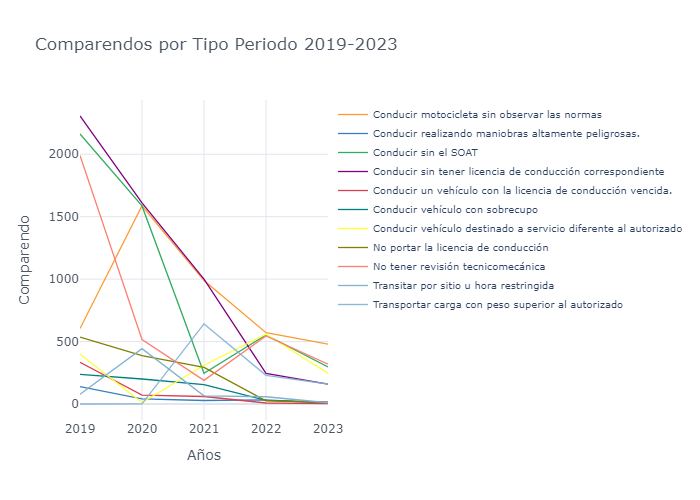

In [43]:
#Creamos grafico de lineas
fig_comparendo_tipo = df_comparendos_porTipo.iplot(kind="line", xTitle="Años", yTitle="Comparendo", title="Comparendos por Tipo Periodo 2019-2023", legend={'font': {'size': 10}}, asFigure=True)

#Visualizamos grafico y exportamos
pio.write_image(fig_comparendo_tipo, "D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_tipo_linea.png")

# Mostrar la imagen guardada en repositorio de Github
Image(filename="D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\comparendos_tipo_linea.png")


#### <font color="greenblue">**Preguntas de negocio:**</font>

##### Con este grafico de lineas damos respuesta a las segundas preguntas de negocio de los puntos: <font color="greenblue">**a)** ¿Qué comparendos muestran las tendencias más significativas?, **b)** ¿Hay algún tipo de comparendo que haya tenido un cambio drástico en un año específico? y **c)** ¿Existen ciertos tipos de comparendos que son más prevalentes en años específicos?</font>

##### <font color="greenblue">Los Tipos de Comparendos con una mayor tendencia negativa(decremento) son: Conducir sin tener licencia de conducción correspondiente, Conducir sin el SOAT, Conducir motocicleta sin observar las normas y No tener revisión tecnicomecánica. Se resalta que el comparendo "Conducir sin tener licencia de conducción correspondiente" mantuvo siempre su tendencia decreciente

##### <font color="greenblue">Se observan incrementos drasticos en los comparendos "Conducir motocicleta sin observar las normas" y "Transitar por sitio u hora restringida" en el año 2020 (pandemia) "Transportar carga con peso superior al autorizado" en el año 2021 (postpandemia).</font> 

##### <font color="greenblue">Se observan reducciones drasticas en los comparendos "No tener revisión tecnicomecánica" en el año 2020 (pandemia), "Conducir sin el SOAT" en el año 2021 (postpandemia) y "Conducir sin tener licencia de conducción correspondiente" en el año 2022.</font> 

##### <font color="greenblue">En los años de prepandemia(2019) y pandemia(2020), los comparendos mas prevalentes fueron: Conducir sin tener licencia de conducción correspondiente, Conducir sin el SOAT, Conducir motocicleta sin observar las normas y No tener revisión tecnicomecánica y, en el año postpandemia(2021), los comparendos mas prevalentes fueron: Conducir sin tener licencia de conducción correspondiente, Conducir motocicleta sin observar las normas y Transportar carga con peso superior al autorizado.</font> 

##### <font color="greenblue">Es de observar que en los dos ultimos años del estudio (2022 y 2023) se percibe un mayor numero de comparendos por concepto de "Conducir motocicleta sin observar las normas".</font> 
</font> 

### <font color="redblue"> **2.4. Graficos de dispersion**</font>

#### <font color="redblue"> **2.4.1. Grafico Total Comparendos por Año**</font>

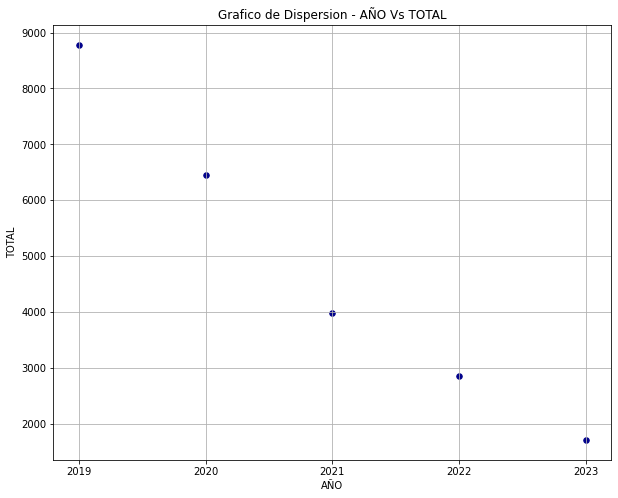

In [44]:
colors= np.random.rand(55)

#Creamos grafico de dispersion
plt.figure(figsize=(10,8))
plt.scatter(comparendo_anual["AÑO"], comparendo_anual["TOTAL"], s= 30, c="darkblue")
plt.grid(True)

#Editamos Titulos del grafico y de Etiquetas
plt.title("Grafico de Dispersion - AÑO Vs TOTAL")
plt.xlabel("AÑO")
plt.ylabel("TOTAL")

#Guardamos grafico en carpeta y visualizamos
plt.savefig("D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\graficoDispersion.jpeg")
plt.show()

#### <font color="redblue"> **2.4.2. Grafico Comparendos por Tipo/Año**</font>

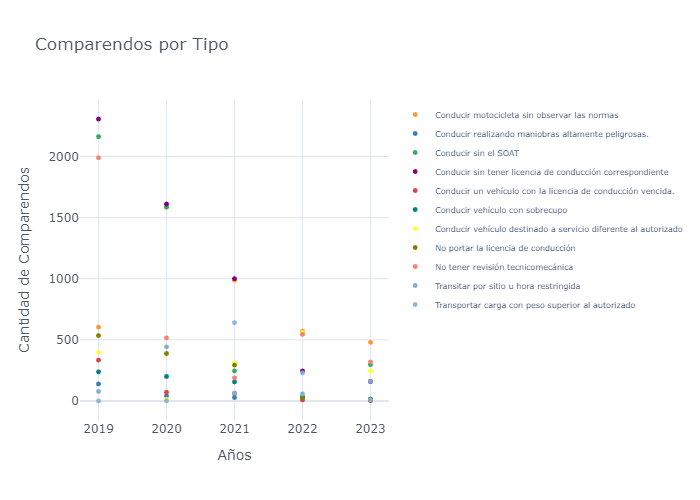

In [45]:
#Creamos grafico de dispersion por Tipo de Comparendo
fig_dispersion_comparendo_porTipo = df_comparendos_porTipo.iplot(kind="scatter", mode='markers', xTitle="Años", yTitle="Cantidad de Comparendos", title="Comparendos por Tipo", symbol="circle", size=4.9, legend={'font': {'size': 8}}, asFigure=True)

#Guardamos grafico en carpeta y visualizamos
pio.write_image(fig_dispersion_comparendo_porTipo,"D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\graficoDispersion_porTipo.png")

# Mostrar la imagen guardada en repositorio de Github
Image(filename="D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\graficoDispersion_porTipo.png")


### <font color="redblue"> **3. Otras Visualizaciones y Analisis**</font>

#### <font color="redblue"> **3.1 Analisis de comparendos mas representativos**</font>

##### A continuacion analizamos los cuatro tipos de comparendos mas representativos en cantidad, los cuales, representan el **75,51%** del total de comparendos impuestos en el periodo 2019-2023.

##### <font color="redblue"> **3.1.1 Grafico de barras**</font>

In [46]:
#Generamos DataFrame para trabajar
df_mayor_comparendos = df_comparendos_porTipo[["Conducir motocicleta sin observar las normas", "Conducir sin el SOAT", "No tener revisión tecnicomecánica", "Conducir sin tener licencia de conducción correspondiente"]]
df_mayor_comparendos

COMPARENDO,Conducir motocicleta sin observar las normas,Conducir sin el SOAT,No tener revisión tecnicomecánica,Conducir sin tener licencia de conducción correspondiente
variable,,,,
2019,604,2162,1990,2306
2020,1587,1586,516,1611
2021,988,246,189,1000
2022,571,553,545,245
2023,480,297,319,159


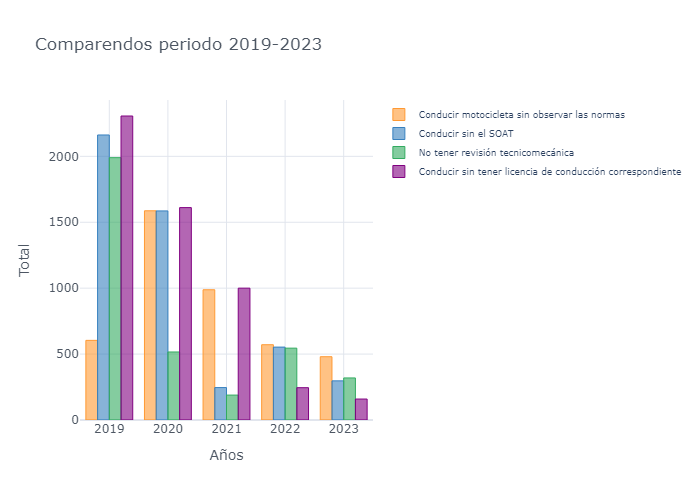

In [47]:
#Graficamos diagrama de barras con Cufflinks
mayor_comparendo_porTipo = df_mayor_comparendos.iplot(kind="bar", xTitle="Años", yTitle="Total", title="Comparendos periodo 2019-2023", legend={'font': {'size': 9}}, asFigure=True)

#Guardamos grafico en carpeta y visualizamos
pio.write_image(mayor_comparendo_porTipo,"D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\mayores_comparendo_porTipo.png")

#Mostrar la imagen guardada en repositorio de Github
Image(filename="D:\\Ricardo\\Programacion\\Data_Science\\Proyectos_DS\\comparendos_transito_Bolivar\\results\\plots\\mayores_comparendo_porTipo.png")


###     **... to be continued**